In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import gc

import seaborn as sns
from seaborn import objects
sns.set_theme()
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


## Import Dataset

In [52]:
df= pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv").copy()

## Data Description and Summary

In [53]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [54]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [55]:
# Convert Date to Datetime
df["Date"]= pd.to_datetime(df["Date"])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [57]:
df_obj= df.drop(["Date"], axis=1).select_dtypes(object)
df_obj.describe()

,Province/State,Country/Region,WHO Region
count,14664,49068,49068
unique,78,187,6
top,Australian Capital Territory,China,Europe
freq,188,6204,15040


In [58]:
df_int= df.select_dtypes(int)
df_int.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [59]:
df.duplicated().sum()

0

In [60]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [61]:
df["Year"], df["Month"], df["Day"]= df.Date.dt.year, df.Date.dt.month_name(), df.Date.dt.day_name()

In [62]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Year,Month,Day
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020,January,Wednesday
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,2020,January,Wednesday
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,2020,January,Wednesday
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,2020,January,Wednesday
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,2020,January,Wednesday


In [63]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July'],
      dtype=object)

In [64]:
df.Day.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [65]:
df.Year.unique()

array([2020], dtype=int32)

## Data Exploration and Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Confirmed'>

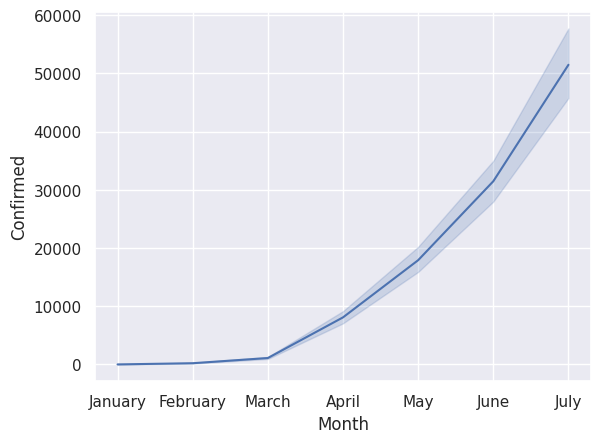

In [70]:
sns.lineplot(df, x="Month", y="Confirmed")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Confirmed'>

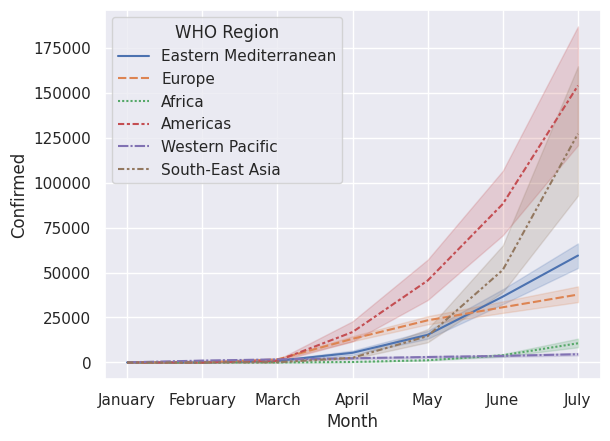

In [83]:
sns.lineplot(df, x="Month", y="Confirmed", hue= "WHO Region", style="WHO Region")

Text(0.5, 1.0, 'Confirmed Cases by Continent')

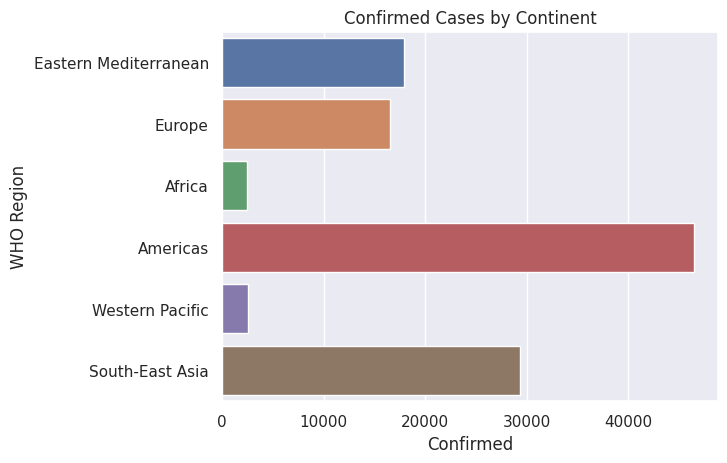

In [80]:
fig,ax= plt.subplots()
sns.barplot(df, x=df["Confirmed"], y= df["WHO Region"], errorbar=None)
ax.set_title("Confirmed Cases by Continent")
# plt.savefig("")

In [ ]:
region= df.groupby(df["WHO Region"])
region

In [ ]:
# sns.barplot(df, y="Confirmed", x=df.Month, errorbar=None)
plt.bar(df, y="Confirmed", x=df.Month, errorbar=None)